### Integration PV und WP

In [1]:
# Abfrage
# strombedarf oder anzahl_personen -> Strombedarf und TWE
# baujahr & flaeche -> Heizlast und Heizwärmebedarf
# TRY Region & T_n_aussen aus Tabelle
# Bestand oder NEH (NEH wenn Heizbedarf < 40 kWh/m2) -> Energiefaktoren für beide sollten einfacher anrufbar sein
# Tagesenergiebedarf - Abhängig von Strom, Heiz und TWE-Bedarf
# Referenzlastprofile Bestand oder NEH
# RLP * Tagesenergiebedarf
# Typtag Verteilung Tabelle (TRY) 
# Lastprofile erstellen (Stündlich) -> Heizwärmebedarf
# df für alles wichtiges benutzen

# WP Größe = Heizlast
# PS Größe V_ps_einfach = 20 l * Heizlast -> V_ps aus auwahl 100-500, unterschiedlieche Verluste
# Wärmegehalt V_ps

# t_amb 
# Heizkurve (2014) -> für t_vor & t_rueck
# COP Tabelle (interpoliert) und für T_amb & T_Vor zuweisen
# Heizwärme Auslegung -> Heizleistung
# Heizleistung aus Heizwärme Auslegung
# Berechnung WP mit PS (& PV) - Wärmegehalt, Ladezustand, Heizleistung neu
# P_el & Stromkosten

In [2]:
import lastprofile_VDI4655

q = lastprofile_VDI4655.get_lastprofile(14400, 4000, 1500, 200, 5, 3)
q

,Strombedarf,Warmwasserbedarf,Heizwärmebedarf
Zeit,,,
2014-01-01 00:00:00,0.168484,0.000000,0.518056
2014-01-01 01:00:00,0.159901,0.000000,0.823876
2014-01-01 02:00:00,0.170752,0.000000,1.116919
2014-01-01 03:00:00,0.168494,0.000000,1.359407
2014-01-01 04:00:00,0.165048,0.000000,1.280667
...,...,...,...
2014-12-31 19:00:00,0.597459,0.041829,4.807082
2014-12-31 20:00:00,0.579072,0.000000,3.853547
2014-12-31 21:00:00,0.558124,0.000000,1.934805


In [3]:
import temperatur_aussen
q['T_aussen'] = temperatur_aussen.get_hourly_temperature(40599, 2014)
q

,Strombedarf,Warmwasserbedarf,Heizwärmebedarf,T_aussen
Zeit,,,,
2014-01-01 00:00:00,0.168484,0.000000,0.518056,6.3
2014-01-01 01:00:00,0.159901,0.000000,0.823876,5.0
2014-01-01 02:00:00,0.170752,0.000000,1.116919,5.1
2014-01-01 03:00:00,0.168494,0.000000,1.359407,5.5
2014-01-01 04:00:00,0.165048,0.000000,1.280667,5.7
...,...,...,...,...
2014-12-31 19:00:00,0.597459,0.041829,4.807082,1.9
2014-12-31 20:00:00,0.579072,0.000000,3.853547,1.4
2014-12-31 21:00:00,0.558124,0.000000,1.934805,1.1


In [4]:
import try_region

TRY_region, T_n_aussen = try_region.get_try_t_n_aussen(40599)
T_n_aussen


-7.8

In [5]:
import pv_profil

pv = pv_profil.get_pv_profil(40599, 2014, 10)
pv

time
2014-01-01 00:00:00+00:00    0.0
2014-01-01 01:00:00+00:00    0.0
2014-01-01 02:00:00+00:00    0.0
2014-01-01 03:00:00+00:00    0.0
2014-01-01 04:00:00+00:00    0.0
                            ... 
2014-12-31 19:00:00+00:00    0.0
2014-12-31 20:00:00+00:00    0.0
2014-12-31 21:00:00+00:00    0.0
2014-12-31 22:00:00+00:00    0.0
2014-12-31 23:00:00+00:00    0.0
Freq: h, Name: P, Length: 8760, dtype: float64

In [6]:
pv.sum()

11282.0256

In [7]:
import lastprofile_VDI4655
h, w, twe, s = lastprofile_VDI4655.get_jahresenergiebedarf('Nach 2002', 200, 3, 0)
h

9.0

In [8]:
import pandas as pd
import temperatur_aussen, lastprofile_VDI4655
## Aussen Temperatur
t_aussen = temperatur_aussen.get_hourly_temperature(40599, 2014)
lastprofil_h = pd.DataFrame()
lastprofil_h['T_aussen'] = t_aussen

## Lastprofile erstellen
lastprofil = lastprofile_VDI4655.get_lastprofile(14400, 4000, 1500, 200, 5, 3)
lastprofil_h = lastprofil_h.join(lastprofil)
lastprofil_h


,T_aussen,Strombedarf,Warmwasserbedarf,Heizwärmebedarf
time,,,,
2014-01-01 00:00:00,6.3,0.168484,0.000000,0.518056
2014-01-01 01:00:00,5.0,0.159901,0.000000,0.823876
2014-01-01 02:00:00,5.1,0.170752,0.000000,1.116919
2014-01-01 03:00:00,5.5,0.168494,0.000000,1.359407
2014-01-01 04:00:00,5.7,0.165048,0.000000,1.280667
...,...,...,...,...
2014-12-31 19:00:00,1.9,0.597459,0.041829,4.807082
2014-12-31 20:00:00,1.4,0.579072,0.000000,3.853547
2014-12-31 21:00:00,1.1,0.558124,0.000000,1.934805


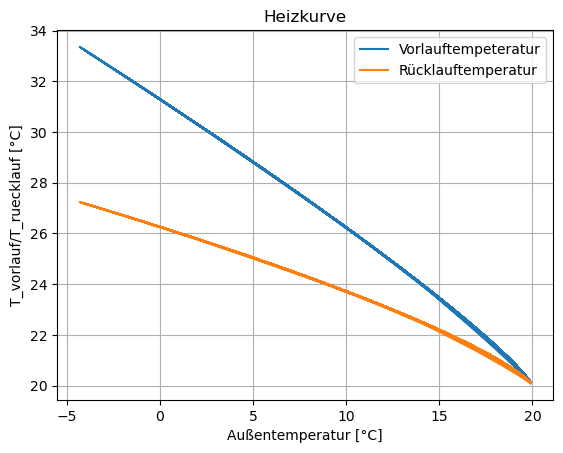

<module 'matplotlib.pyplot' from 'c:\\Users\\DianaEspinosaLozano\\anaconda3\\envs\\thesis_venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [9]:
import heizkurve

hz, T_soll, T_n_vor, T_n_rueck = heizkurve.get_heizkurve('Fußbodenheizung', lastprofil_h['T_aussen'], T_n_aussen)
heizkurve.plot_heizkurve(hz)

In [10]:
hz

,T_aussen,Lastverhältnis,e^x,T_vor,T_rueck
time,,,,,
2014-01-01 00:00:00,6.3,0.492806,1.731821,28.163419,24.713778
2014-01-01 01:00:00,5.0,0.539568,1.748504,28.823017,25.046039
2014-01-01 02:00:00,5.1,0.535971,1.747257,28.772557,25.020759
2014-01-01 03:00:00,5.5,0.521583,1.742212,28.570264,24.919185
2014-01-01 04:00:00,5.7,0.514388,1.739653,28.468840,24.868121
...,...,...,...,...,...
2014-12-31 19:00:00,1.9,0.651079,1.784545,30.366719,25.809165
2014-12-31 20:00:00,1.4,0.669065,1.789944,30.612293,25.928840
2014-12-31 21:00:00,1.1,0.679856,1.793135,30.759222,26.000229


In [13]:
import importlib
import heizkurve, berechnen_wp  
importlib.reload(heizkurve)
importlib.reload(berechnen_wp)

lastprofil_h['T_vor'] = hz['T_vor']
lastprofil_h['T_rueck'] = hz['T_rueck']
wp_groesse = berechnen_wp.get_waermepumpe(h)
heizleistung_auslegung = heizkurve.get_heizleistung(T_n_aussen, h, T_soll)
lastprofil_h = heizkurve.get_heizleistung_profil(lastprofil_h, heizleistung_auslegung)
# lastprofil_h['COP'] = heizkurve.get_cop(wp_groesse, lastprofil_h)

In [15]:
import importlib
import heizkurve
importlib.reload(heizkurve)
lastprofil_h = heizkurve.get_cop(wp_groesse, lastprofil_h)

In [16]:
lastprofil_h

,T_aussen,Strombedarf,Warmwasserbedarf,Heizwärmebedarf,T_vor,T_rueck,Heizleistung,COP
time,,,,,,,,
2014-01-01 00:00:00,6.3,0.168484,0.000000,0.518056,28.163419,24.713778,3.434211,4.22
2014-01-01 01:00:00,5.0,0.159901,0.000000,0.823876,28.823017,25.046039,3.947368,4.0
2014-01-01 02:00:00,5.1,0.170752,0.000000,1.116919,28.772557,25.020759,3.907895,4.0
2014-01-01 03:00:00,5.5,0.168494,0.000000,1.359407,28.570264,24.919185,3.750000,4.08
2014-01-01 04:00:00,5.7,0.165048,0.000000,1.280667,28.468840,24.868121,3.671053,4.08
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,1.9,0.597459,0.041829,4.807082,30.366719,25.809165,5.171053,3.64
2014-12-31 20:00:00,1.4,0.579072,0.000000,3.853547,30.612293,25.928840,5.368421,3.58
2014-12-31 21:00:00,1.1,0.558124,0.000000,1.934805,30.759222,26.000229,5.486842,3.52


In [17]:
import importlib
import berechnen_wp  
importlib.reload(berechnen_wp)
V_ps, PS_verlust, Q_ps = berechnen_wp.get_pufferspeicher(h, T_n_vor, T_n_rueck)
df, P_el, COP = berechnen_wp.ohne_pv(lastprofil_h, Q_ps, PS_verlust)
print('Volumen Speicher: ', V_ps)
print('Verlust Speicher: ', PS_verlust)
print('Wärmegehalt Speicher: ', Q_ps)
print('P_el: ', P_el)
print('COP: ', COP)

Volumen Speicher:  200
Verlust Speicher:  0.05833333333333333
Wärmegehalt Speicher:  1.626
P_el:  3262.24
COP:  4.19


The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




In [26]:
lastprofil_h

,T_aussen,Strombedarf,Warmwasserbedarf,Heizwärmebedarf,T_vor,T_rueck,Heizleistung,COP,Wärmegehalt PS,Ladezustand PS,Heizleistung neu,temp_mittel,Wärmebedarf_mittel,elekt. Leistungaufnahme,therm. Entnahmelesitung,PV Ertrag,Überschuss,PV to WP,Eigenverbrauch
time,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,6.3,0.168484,0.000000,0.518056,28.163419,24.713778,3.434211,4.22,1.626000,1.000000,3.434211,6.300000,0.518056,0.813794,2.620417,0.0,0.0,0.0,0.0
2014-01-01 01:00:00,5.0,0.159901,0.000000,0.823876,28.823017,25.046039,3.947368,NaN,0.743790,0.457436,0.000000,5.650000,0.670966,0.000000,3.947368,0.0,0.0,0.0,0.0
2014-01-01 02:00:00,5.1,0.170752,0.000000,1.116919,28.772557,25.020759,3.907895,4.00,3.476433,1.000000,3.907895,5.466667,0.819617,0.976974,2.930921,0.0,0.0,0.0,0.0
2014-01-01 03:00:00,5.5,0.168494,0.000000,1.359407,28.570264,24.919185,3.750000,NaN,2.058693,1.000000,0.000000,5.475000,0.954565,0.000000,3.750000,0.0,0.0,0.0,0.0
2014-01-01 04:00:00,5.7,0.165048,0.000000,1.280667,28.468840,24.868121,3.671053,NaN,0.719692,0.442615,0.000000,5.520000,1.019785,0.000000,3.671053,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,1.9,0.597459,0.041829,4.807082,30.366719,25.809165,5.171053,3.64,1.681338,1.000000,5.171053,2.777083,3.760000,1.420619,3.750434,0.0,0.0,0.0,0.0
2014-12-31 20:00:00,1.4,0.579072,0.000000,3.853547,30.612293,25.928840,5.368421,3.58,3.137879,1.000000,5.368421,2.839583,3.760000,1.499559,3.868862,0.0,0.0,0.0,0.0
2014-12-31 21:00:00,1.1,0.558124,0.000000,1.934805,30.759222,26.000229,5.486842,NaN,1.144741,0.704023,0.000000,2.891667,3.760000,0.000000,5.486842,0.0,0.0,0.0,0.0


In [ ]:
T_n_rueck

In [19]:
import pv_profil
import berechnen_wp
importlib.reload(berechnen_wp)
importlib.reload(pv_profil)

pv = pv_profil.get_pv_profil(40599, 2014, 10)

lastprofil_h = berechnen_wp.mit_pv(lastprofil_h, pv)
print('P_el: ', P_el)
print('P_el aus PV: ', round(lastprofil_h['PV to WP'].sum(), 2))

P_el:  3262.24
P_el aus PV:  1050.91


In [ ]:
lastprofil_h

In [ ]:
print("Gesamte WP P_el from PV:", lastprofil_h['WP P_el from PV'].sum())
print("Gesamte P_el:", P_el)

In [25]:
import berechnen_wp
importlib.reload(berechnen_wp)
strompreis = 0.358
kosten_ohne, kosten_mit, einnahmen, ersparnis = berechnen_wp.kosten_pv(lastprofil_h, strompreis)

print('Stromkosten WP ohne PV: ', kosten_ohne)
print('Stromkosten WP mit PV: ', kosten_mit)
print('Vergütung: ', einnahmen)
print('Einsparung mit PV: ', ersparnis)
print('Final Stromkosten: ', round(kosten_mit-einnahmen, 2))

Stromkosten WP ohne PV:  2600.13
Stromkosten WP mit PV:  1263.37
Vergütung:  584.73
Einsparung mit PV:  1921.49
Final Stromkosten:  678.64
